# Milestone 2

Jacek Wiśniewski,
Konrad Welkier,
Piotr Sieńko

## 1. Usuwanie zmiennych


In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, mixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

data = pd.read_csv("online_shoppers_intention.csv")

result = data.Revenue.astype(int)

# Usuwanie zmiennej celu + informacji nie wpływających na wynik
df = data.drop(["Revenue", "Month", "Weekend", "VisitorType"], axis = 1)

# Usuwanie zmiennych zakodowanych w innych zmiennych
df = df.drop(["Informational", "Administrative", "ProductRelated"], axis = 1)

#Zostawiamy tylko 3 główne przeglądarki internetowe i systemy operacyjne
df.loc[~df.Browser.isin([1,2,3]),'Browser'] = -1
df.loc[~df.OperatingSystems.isin([1,2]),'OperatingSystems'] = -1

## 2. Standaryzowanie

In [16]:
# Standaryzowanie 
Standarized = pd.DataFrame(df[['ExitRates','PageValues', 'SpecialDay', 'BounceRates',
                               'Administrative_Duration',"Informational_Duration", "ProductRelated_Duration"]])
Standarized = StandardScaler().fit_transform(Standarized)

df[['ExitRates','PageValues', 'SpecialDay', "BounceRates", 
   "Administrative_Duration","Informational_Duration", "ProductRelated_Duration"]] = Standarized

df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-0.317178,-0.308821,1,1,1,1
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,1,2
2,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1,1,9,3
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1,2,2,4
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1,3,1,4


## 3. Wstępne Modele

## KMeans - 1 próba

In [18]:
from sklearn import metrics
from sklearn.metrics import silhouette_score


# Klasteryzacja
kmeans = KMeans(n_clusters=2, random_state=0, init = 'random', n_init = 10)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)


print("Accuracy -> " + str(metrics.accuracy_score(result, y_kmeans)))
print("Adjusted Rand score -> " + str(metrics.adjusted_rand_score(result, y_kmeans)))
print("Silhouette score -> " + str(silhouette_score(df, y_kmeans)))
print("Precision -> " + str(metrics.precision_score(result, y_kmeans)))
print("Recall -> " + str(metrics.recall_score(result, y_kmeans)))
print("      ")
df2 = pd.DataFrame({'nasz' : y_kmeans, 'prawdziwy': result})

# Crosstab - odpowiednik macierzy TP,TN,FP,FN
ct = pd.crosstab(df2['nasz'], df2['prawdziwy'])

print(ct)

Accuracy -> 0.7288726682887267
Adjusted Rand score -> 0.002914198259632032
Silhouette score -> 0.49335301746555515
Precision -> 0.15849595430747263
Recall -> 0.17452830188679244
      
prawdziwy     0     1
nasz                 
0          8654  1575
1          1768   333


## AgglomerativeClustering - 1 próba

In [19]:
model = AgglomerativeClustering(n_clusters=2)
y_agg = model.fit_predict(df)

In [20]:
print("Accuracy -> " + str(metrics.accuracy_score(result, y_agg)))
print("Adjusted Rand score -> " + str(metrics.adjusted_rand_score(result, y_agg)))
print("Silhouette score -> " + str(silhouette_score(df, y_agg)))
print("Precision -> " + str(metrics.precision_score(result, y_agg)))
print("Recall -> " + str(metrics.recall_score(result, y_agg)))
print("      ")
df2 = pd.DataFrame({'nasz' : y_agg, 'prawdziwy': result})

# Crosstab - odpowiednik macierzy TP,TN,FP,FN
ct = pd.crosstab(df2['nasz'], df2['prawdziwy'])

print(ct)

Accuracy -> 0.7045417680454177
Adjusted Rand score -> 0.00044710543983559226
Silhouette score -> 0.4396768841494258
Precision -> 0.15534366309098133
Recall -> 0.20492662473794548
      
prawdziwy     0     1
nasz                 
0          8296  1517
1          2126   391


## PCA - 1 próba 

Użyliśmy PCA do stworzenia 3 składowych głównych dla naszych wartości i zwizualizowania wyników. Następnie narysowaliśmy scatter plot w 3d i dopasowaliśmy kolory do prawdziwego (L) i wynikowego (P) podziału.

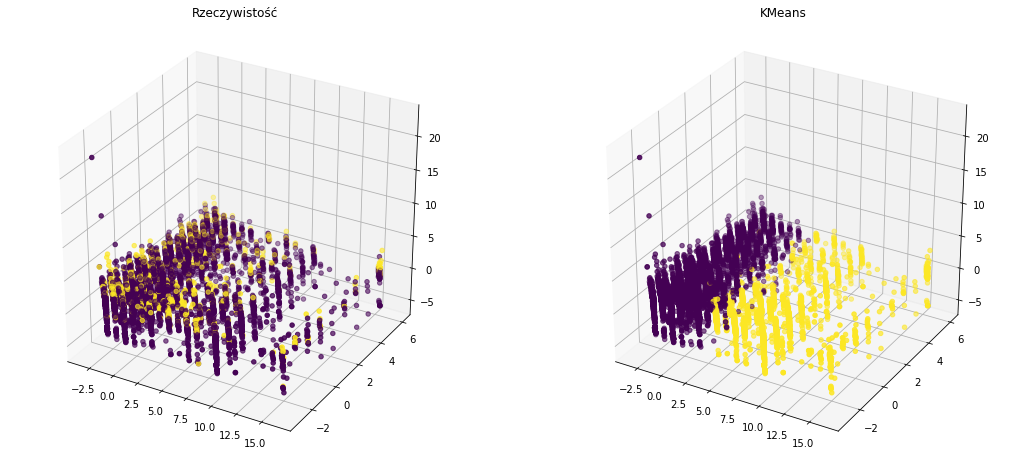

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm

pca = PCA(n_components= 3)
pca.fit(df)
pca_features = pca.transform(df)

xs = pca_features[:,0]
ys = pca_features[:,1]
zs = pca_features[:,2]

# Rysujemy 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))

ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(xs, ys, zs, c = result)
ax.title.set_text('Rzeczywistość')

ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(xs, ys, zs, c = y_kmeans)
ax.title.set_text('KMeans')

plt.show()

Jak widać, wynik słabo odwzorowuje relacje. Można zauważyć z lewego wykresu, że punkty z Revenue == TRUE są zgrupowane na skraju osi Z. Na następnym wykresie widać to trochę lepiej.

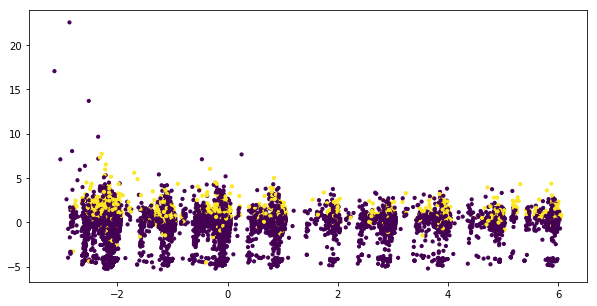

In [7]:
xs = pca_features[:,0]
ys = pca_features[:,1]
zs = pca_features[:,2] 

fig = plt.figure(figsize=(10, 5))


plt.scatter(ys, zs, c = result, s = 10)
plt.show()

Metodą empiryczną doszliśmy do wniosku, że za wyniki na osi Z odpowiada zmienna PageValues. Żeby zwiększyć wagę tej zmiennej dla końcowego wyniku, powiększyliśmy ją dziesięciokrotnie i powtórzyliśmy eksperyment.

In [22]:
df_modified = df
df_modified.loc[:, "PageValues"] = df_modified.loc[:, "PageValues"] * 10
df_modified.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-3.171778,-0.308821,1,1,1,1
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-3.171778,-0.308821,2,2,1,2
2,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-3.171778,-0.308821,-1,1,9,3
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-3.171778,-0.308821,-1,2,2,4
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-3.171778,-0.308821,-1,3,1,4


## KMeans - 2 próba 

In [23]:
# Klasteryzacja
kmeans = KMeans(n_clusters=2, random_state=0, init = 'random', n_init = 10)
kmeans.fit(df_modified)
y_kmeans = kmeans.predict(df_modified)

print("Accuracy -> " + str(metrics.accuracy_score(result, y_kmeans)))
print("Adjusted Rand score -> " + str(metrics.adjusted_rand_score(result, y_kmeans)))
print("Silhouette score -> " + str(silhouette_score(df_modified, y_kmeans)))
print("Precision -> " + str(metrics.precision_score(result, y_kmeans)))
print("Recall -> " + str(metrics.recall_score(result, y_kmeans)))
print("      ")
df3 = pd.DataFrame({'nasz' : y_kmeans, 'prawdziwy': result})

# Crosstab - odpowiednik macierzy TP,TN,FP,FN
ct = pd.crosstab(df3['nasz'], df3['prawdziwy'])

print(ct)

Accuracy -> 0.8769667477696674
Adjusted Rand score -> 0.3090556140115334
Silhouette score -> 0.7433777064052579
Precision -> 0.781294964028777
Recall -> 0.28459119496855345
      
prawdziwy      0     1
nasz                  
0          10270  1365
1            152   543


## AgglomerativeClustering - 2 próba

In [24]:
model = AgglomerativeClustering(n_clusters=2)
y_agg = model.fit_predict(df_modified)

In [25]:
y_agg[y_agg==1] = 2
y_agg[y_agg==0] = 1
y_agg[y_agg==2] = 0

In [26]:
print("Accuracy -> " + str(metrics.accuracy_score(result, y_agg)))
print("Adjusted Rand score -> " + str(metrics.adjusted_rand_score(result, y_agg)))
print("Silhouette score -> " + str(silhouette_score(df_modified, y_agg)))
print("Precision -> " + str(metrics.precision_score(result, y_agg)))
print("Recall -> " + str(metrics.recall_score(result, y_agg)))
print("      ")
df2 = pd.DataFrame({'nasz' : y_agg, 'prawdziwy': result})

# Crosstab - odpowiednik macierzy TP,TN,FP,FN
ct = pd.crosstab(df2['nasz'], df2['prawdziwy'])

print(ct)

Accuracy -> 0.8921330089213301
Adjusted Rand score -> 0.47169565600894325
Silhouette score -> 0.6294988368671505
Precision -> 0.6908850726552179
Recall -> 0.5482180293501048
      
prawdziwy     0     1
nasz                 
0          9954   862
1           468  1046


## PCA - 2 próba

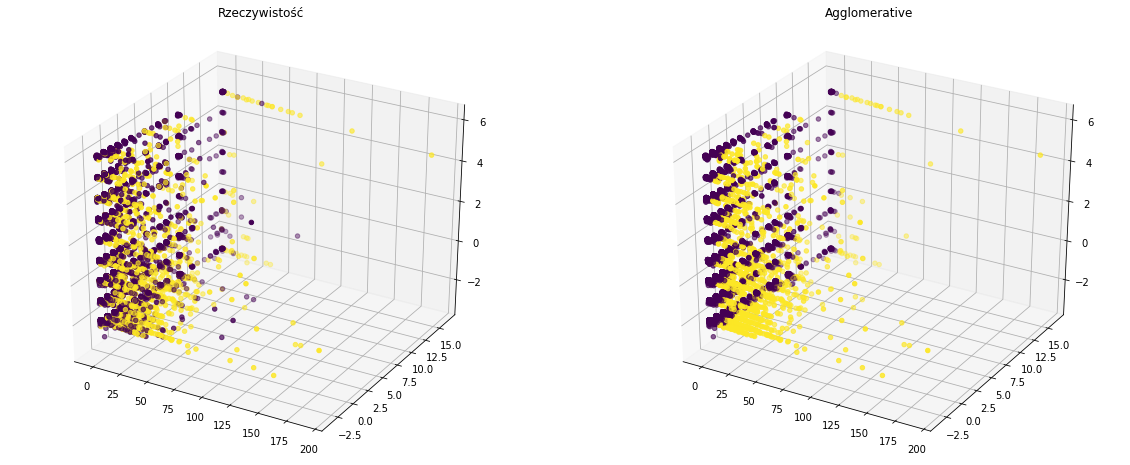

In [28]:
pca = PCA(n_components= 3)
pca.fit(df_modified)
pca_features = pca.transform(df_modified)

xs = pca_features[:,0]
ys = pca_features[:,1]
zs = pca_features[:,2]

# Rysujemy 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(xs, ys, zs, c = result)
ax.title.set_text('Rzeczywistość')

ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(xs, ys, zs, c = y_agg)
ax.title.set_text('Agglomerative')

Grupowanie wyników w drugim podejściu dużo lepiej odwzorowuje rzeczywistość w porównaniu do pierwszej próby.

Poniżej wykres dla prawdziwych danych. Widać że dalej jest miejsce do poprawy.

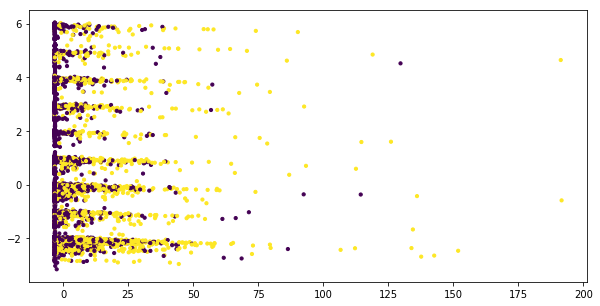

In [14]:
xs = pca_features[:,0]
ys = pca_features[:,1]
zs = pca_features[:,2] 

fig = plt.figure(figsize=(10, 5))


plt.scatter(xs, zs, c = result, s = 10)
plt.show()

# Podsumowanie

- Zbiór na którym pracujemy jest niezbalansowany i dlatego wysokie wyniki accuracy powinny być traktowane z dystansem. W poszukiwaniu wiarygodnej miary testujemy różne metody, żeby nie zakłamać wyniku.
- Zmienna PageValues jest na ten moment dla nas kluczowa i dla tej zmiennej będziemy robić więcej eksperymentów.
- Ponieważ wyniki są pomieszane nie tylko względem zmiennej pageValues, będziemy poszukiwać innych zależności, żeby model docelowy osiągał jak najlepsze wyniki.
- Wybór algorytmu klasyfikującego jest jeszcze kwestią otwartą.

## Oświadczenie

Potwierdzamy samodzielność powyższej pracy oraz niekorzystanie przeze nas z niedozwolonych źródeł.